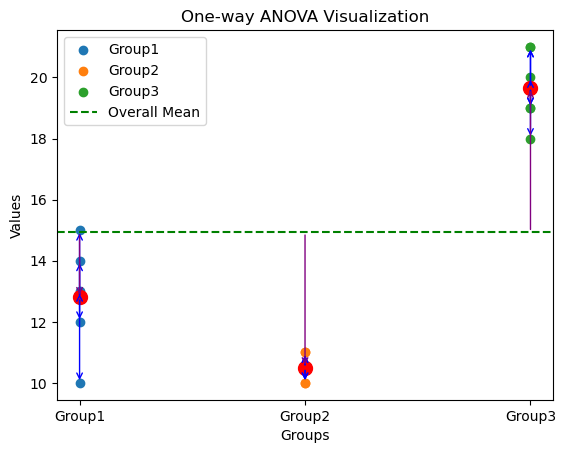

In [10]:
import matplotlib.pyplot as plt

data = {
    'Group1': [12, 14, 15, 10, 13],
    'Group2': [10, 11, 10, 11],
    'Group3': [19, 18, 20, 21, 19, 21]
}

# Overall mean
all_values = [val for sublist in data.values() for val in sublist]
overall_mean = sum(all_values) / len(all_values)

group_means = {group: sum(values) / len(values) for group, values in data.items()}

# Between-group sum of squares
ssb = sum([len(group) * (mean - overall_mean) ** 2 for group, mean in group_means.items()])

# Within-group sum of squares
ssw = sum([sum([(value - group_means[group]) ** 2 for value in values]) for group, values in data.items()])

# Degrees of freedom
dfb = len(data) - 1
dfw = len(all_values) - len(data)

# Mean sum of squares
msb = ssb / dfb
msw = ssw / dfw

# F-statistic
f_stat = msb / msw

# Plotting
for idx, (group, values) in enumerate(data.items()):
    plt.scatter([idx] * len(values), values, label=group)

for idx, mean in enumerate(group_means.values()):
    plt.scatter(idx, mean, color='red', s=100)

plt.axhline(overall_mean, color='green', linestyle='--', label='Overall Mean')

for idx, (group, values) in enumerate(data.items()):
    for value in values:
        plt.annotate('', xy=(idx, value), xytext=(idx, group_means[group]), 
                     arrowprops=dict(arrowstyle='->', color='blue'))

for idx, mean in enumerate(group_means.values()):
    plt.annotate('', xy=(idx, mean), xytext=(idx, overall_mean), 
                 arrowprops=dict(arrowstyle='->', color='purple'))

plt.legend()
plt.title(f'One-way ANOVA Visualization\n F-statistic: {f_stat:.2f}')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.xticks(ticks=range(len(data)), labels=data.keys())
plt.show()


* Raw data points are scattered in the plot with each group having its own cluster.
* The red points indicate the mean of each group.
* The green dashed line shows the overall mean of all the data points.
* Blue arrows show the deviation of individual data points from their group mean, representing the within-group variation.
* Purple arrows show the deviation of the group means from the overall mean, representing the between-group variation.

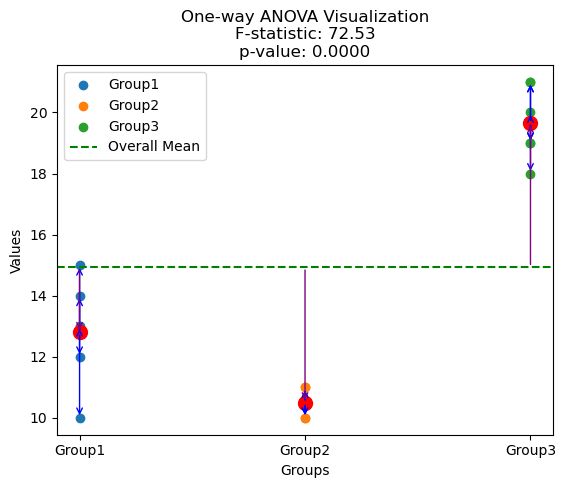

F-statistic: 72.53
p-value: 0.0000
The differences between the group means are statistically significant at the 0.05 level.


In [12]:
import matplotlib.pyplot as plt
from scipy.stats import f

data = {
    'Group1': [12, 14, 15, 10, 13],
    'Group2': [10, 11, 10, 11],
    'Group3': [19, 18, 20, 21, 19, 21]
}

# Overall mean
all_values = [val for sublist in data.values() for val in sublist]
overall_mean = sum(all_values) / len(all_values)

group_means = {group: sum(values) / len(values) for group, values in data.items()}

# Between-group sum of squares
ssb = sum([len(group) * (mean - overall_mean) ** 2 for group, mean in group_means.items()])

# Within-group sum of squares
ssw = sum([sum([(value - group_means[group]) ** 2 for value in values]) for group, values in data.items()])

# Degrees of freedom
dfb = len(data) - 1
dfw = len(all_values) - len(data)

# Mean sum of squares
msb = ssb / dfb
msw = ssw / dfw

# F-statistic
f_stat = msb / msw

# Calculate the p-value
p_value = 1 - f.cdf(f_stat, dfb, dfw)

# Plotting
for idx, (group, values) in enumerate(data.items()):
    plt.scatter([idx] * len(values), values, label=group)

for idx, mean in enumerate(group_means.values()):
    plt.scatter(idx, mean, color='red', s=100)

plt.axhline(overall_mean, color='green', linestyle='--', label='Overall Mean')

for idx, (group, values) in enumerate(data.items()):
    for value in values:
        plt.annotate('', xy=(idx, value), xytext=(idx, group_means[group]), 
                     arrowprops=dict(arrowstyle='->', color='blue'))

for idx, mean in enumerate(group_means.values()):
    plt.annotate('', xy=(idx, mean), xytext=(idx, overall_mean), 
                 arrowprops=dict(arrowstyle='->', color='purple'))

plt.legend()
plt.title(f'One-way ANOVA Visualization\nF-statistic: {f_stat:.2f}\np-value: {p_value:.4f}')
plt.xlabel('Groups')
plt.ylabel('Values')
plt.xticks(ticks=range(len(data)), labels=data.keys())
plt.show()

print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The differences between the group means are statistically significant at the 0.05 level.")
else:
    print("The differences between the group means are not statistically significant at the 0.05 level.")
